# AdventureWorks Försäljningsanalys
Vi undersöker AdventureWorks data för att besvara affärsfrågor.

- Produktkategorier och försäljning
- Trender
- Segment

Vi använder SQL för att hämta data och Python för visualisering och analys

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

user = "SA"
password = quote_plus("TimAjenR!1")
server = "localhost:1433"
database = "AdventureWorks2025"
driver = quote_plus("ODBC Driver 18 for SQL Server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)

Anslutning till SQL Server lyckades


C:\Users\timry\AppData\Local\Temp\ipykernel_142144\3829750698.py:22: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [2]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql),conn)

## Visualisering 1: Antal produkter per kategori
Affärsfråga: Hur många produkter finns i varje kategori?

Använda tabeller: 
- Production.ProductCategory
- Production.ProductSubcategory
- Production.Product

Plan:
- JOINA tabellerna
- Räkna DISTINCT produkter per kategori
- Skapa vertikalt stapeldiagram
- Analysera resultat

"• Räkna unika produkter per kategori

Krav på visualisering:
• Typ: Vertikalt stapeldiagram (bar)
• Titel: "Antal produkter per kategori"
Krav på insikt:
• Förklara vilken kategori som har flest/minst produkter."

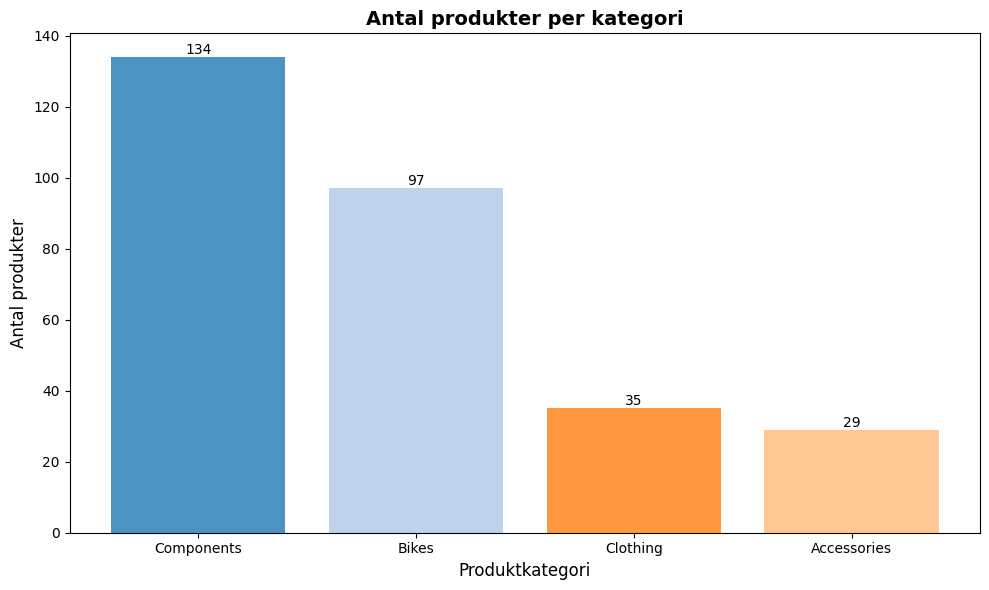

In [ ]:
query_vis1 = """

SELECT
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
INNER JOIN Production.ProductSubcategory psc ON pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product p ON psc.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProductCount DESC

"""

df_vis1 = query_df(query_vis1)

#Färger
colors = plt.cm.tab20(range(len(df_vis1)))

#Plot
fig, ax = plt.subplots(figsize = (10,6))
bars = ax.bar(df_vis1['CategoryName'], df_vis1['ProductCount'],color = colors, alpha = 0.8)

#Siffror
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha = 'center',
        va = 'bottom'
    )

# Titlar
ax.set_xlabel('Produktkategori', fontsize = 12)
ax.set_ylabel('Antal produkter', fontsize = 12)
ax.set_title('Antal produkter per kategori', fontsize = 14, fontweight = 'bold')

#Visa plot
plt.tight_layout()
plt.show()


### Insikter - Antal produkter per kategori
Components har flest produkter på 134 st
Acccessories är minst med 29 produkter.

Slutsats:  
Företaget har en stor del komponenter och reservdelar. Troligtvis för att stötta deras näst största grupp som är cyklar.
Deras minsta diversifierade produktgrupp är accessories , kan vara ett segment som kan utvecklas.